In [1]:
import sklearn

In [2]:

sklearn.__version__  #查看sklearn版本

'0.20.3'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  #画图包
%matplotlib inline
#lab可以不运行这个命令，%魔法命令后不可以加任何的备注

In [4]:
from sklearn.tree import DecisionTreeClassifier #分类树
from sklearn.ensemble import RandomForestClassifier #随机森林分类器
from sklearn.datasets import load_wine #红酒数据集
from sklearn.model_selection import train_test_split #训练集和测试集的切分函数

In [5]:
#导入数据集
wine=load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [6]:
#提取特征和标签
wine.data#特征

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [7]:
wine.target#标签

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [9]:
#查看数据集的大小
wine.data.shape

(178, 13)

In [10]:
pd.DataFrame(wine.data)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0


In [11]:
#切分数据集和训练集
Xtrain, Xtest, Ytrain, Ytest=train_test_split(wine.data,wine.target,test_size=0.3)

In [12]:
#建立模型
clf = DecisionTreeClassifier(random_state=0)#决策树实例化
rfc = RandomForestClassifier(random_state=0)#随机森林实例化

In [13]:
#用训练集训练模型
clf = clf.fit(Xtrain,Ytrain)#训练决策树
rfc = rfc.fit(Xtrain,Ytrain)#训练随机森林 

E:\python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [14]:
#查看模型效果
score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)

In [15]:
score_c

0.9074074074074074

In [16]:
score_r

0.9629629629629629

In [17]:
#绘制一组交叉验证
from sklearn.model_selection import cross_val_score#交叉验证包

In [18]:
#随机森林的交叉验证
rfc = RandomForestClassifier(n_estimators=25)#实例化一个25棵树的森林,在更高的版本中n_estimators默认为100
rfc_s = cross_val_score(rfc,#评估器
                        wine.data,#特征矩阵
                        wine.target,#标签
                        cv=10#交叉验证的折数
                       )#对模型进行十折交叉验证

In [19]:
#决策树的交叉验证
clf = DecisionTreeClassifier()#实例化决策树，决策树只有一棵树
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)#十折交叉验证，评估器，X=wine.data,y=wine.target

In [20]:
rfc_s#随机森林的交叉验证的结果

array([1.        , 0.94444444, 1.        , 0.94444444, 0.94444444,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [21]:
clf_s#决策树的交叉验证的结果

array([0.89473684, 0.83333333, 0.77777778, 0.88888889, 0.83333333,
       0.83333333, 1.        , 0.94444444, 0.94117647, 1.        ])

In [22]:
[*range(1,11)]  #解压range

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

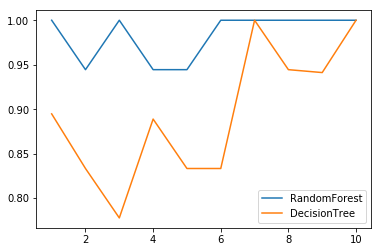

In [23]:
plt.plot(range(1,11),rfc_s,label = "RandomForest")   #label是随机森林
plt.plot(range(1,11),clf_s,label = "DecisionTree")    #label是决策树
plt.legend()#显示图例
plt.show()

RandomForest:
0.9725146198830409
DecisionTree:
0.894702442380461


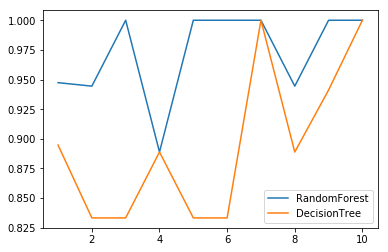

In [24]:
#另一种写法
label = "RandomForest"
for model in [RandomForestClassifier(n_estimators=25),DecisionTreeClassifier()]:
    score = cross_val_score(model,wine.data,wine.target,cv=10)
    print("{}:".format(label)),print(score.mean())
    plt.plot(range(1,11),score,label = label)
    plt.legend()
    label = "DecisionTree"

In [25]:
#绘制十组十折交叉验证
rfc_l = []
clf_l = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_l.append(clf_s)

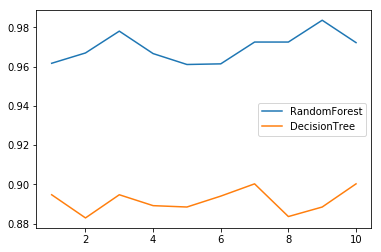

In [26]:
#绘制结果曲线
plt.plot(range(1,11),rfc_l,label = "RandomForest")
plt.plot(range(1,11),clf_l,label = "DecisionTree")
plt.legend()  #显示图例
plt.show()

0.9888888888888889 11


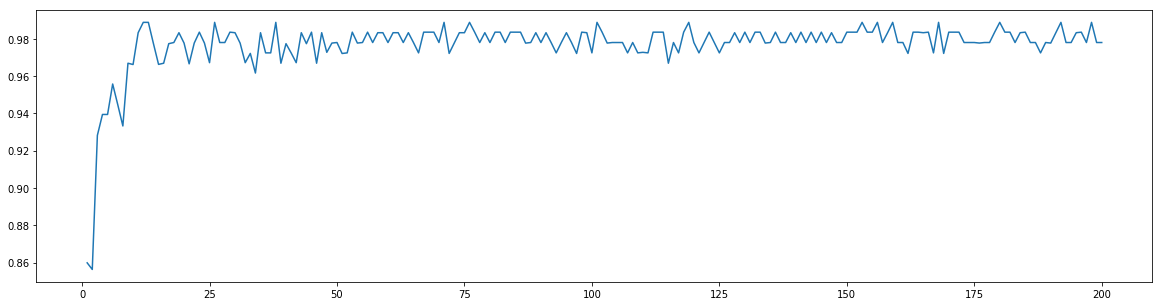

In [27]:
# n_estimators的学习曲线
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1)    #循环200次
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))  #输出最大的值，以及最大的值对应的索引
plt.figure(figsize=[20,5])  #设置画布
plt.plot(range(1,201),superpa)
plt.show()

In [28]:
max(superpa)  #最大的值

0.9888888888888889

In [29]:
superpa.index(max(superpa))  #最大值对应的索引

11

In [30]:
a=[1,2,4,6]

In [31]:
a.index(2)

1

In [32]:
#25棵树判断错误的可能性
from scipy.special import comb #排列组合的包

In [33]:
np.array([comb(25,i)*(0.2**i)*((1-0.2)**(25-i)) for i in range(13,26)]).sum()  #判断错误的综合

0.00036904803455582827

In [34]:
#随机森林中的random_state控制的是生成森林的模式
rfc = RandomForestClassifier(n_estimators=20,random_state=2)   #random_state是固定的
rfc = rfc.fit(Xtrain, Ytrain)

In [35]:
#随机森林的重要属性之一：estimators，查看森林中树的状况
rfc.estimators_[0].random_state

1872583848

In [36]:
#打印出森林中所有树的随机模式
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212


In [38]:
#无需划分训练集和测试集
rfc = RandomForestClassifier(n_estimators=25,oob_score=True)  #oob_score袋外数据，用袋外数据来测试模型
rfc = rfc.fit(wine.data,wine.target)#用全部数据训练模型

In [39]:
#重要属性oob_score_
rfc.oob_score_

0.9719101123595506

In [40]:
#其他参数和接口
rfc=RandomForestClassifier(n_estimators=25)
rfc=rfc.fit(Xtrain,Ytrain)
rfc.score(Xtest,Ytest)

0.9444444444444444

In [41]:
rfc.feature_importances_ #特征重要性

array([0.16255238, 0.0174851 , 0.01442121, 0.02832194, 0.02365234,
       0.05948057, 0.14656119, 0.00879948, 0.04091554, 0.13062257,
       0.07609217, 0.15345971, 0.13763582])

In [44]:
#apply接口，对于决策树来说，apply返回的测试集中每个样本坐落在叶子的索引
rfc.apply(Xtest) 
#对于随机森林来说，apply返回的是测试集中每个样本坐落在森林中每棵树叶子的索引

array([[14, 14, 21, ..., 20, 18, 10],
       [14, 11, 21, ..., 20, 18, 10],
       [10,  3,  7, ...,  5, 12,  7],
       ...,
       [14, 14,  8, ..., 20, 18, 10],
       [14, 14, 21, ..., 20, 18, 10],
       [ 5,  3, 16, ..., 15, 13,  7]], dtype=int64)

In [45]:
rfc.apply(Xtest).shape
#25表示25棵树

(54, 25)

In [46]:
rfc.predict(Xtest) #返回的是每一个样本的预测结果

array([0, 0, 2, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 1, 2, 0, 2, 0, 2, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1,
       0, 1, 2, 0, 0, 0, 2, 0, 0, 2])

In [47]:
rfc.predict_proba(Xtest)#返回的是每一个样本被预测为不同类别的概率
#第一列表示预测为1的概率，第二，三分别表示被预测为1和2的概率

array([[0.96, 0.04, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.32, 0.68],
       [0.  , 0.36, 0.64],
       [1.  , 0.  , 0.  ],
       [0.96, 0.04, 0.  ],
       [0.32, 0.56, 0.12],
       [0.  , 1.  , 0.  ],
       [0.96, 0.04, 0.  ],
       [0.  , 0.72, 0.28],
       [0.08, 0.8 , 0.12],
       [1.  , 0.  , 0.  ],
       [0.08, 0.92, 0.  ],
       [0.  , 0.08, 0.92],
       [0.24, 0.76, 0.  ],
       [0.  , 0.4 , 0.6 ],
       [0.84, 0.16, 0.  ],
       [0.  , 0.2 , 0.8 ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.08, 0.92],
       [1.  , 0.  , 0.  ],
       [0.92, 0.08, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.12, 0.76, 0.12],
       [0.96, 0.04, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.72, 0.28, 0.  ],
       [0.  , 0.04, 0.96],
       [0.08, 0.28, 0.64],
       [1.  , 0.  , 0.  ],
       [0.  , 0.04, 0.96],
       [0.  , 0.16, 0.84],
       [0.  , 0.96, 0.04],
       [0.68, 0.32, 0.  ],
       [0.04, 0.88, 0.08],
 

In [48]:
#bagging的另一个必要条件
x=np.linspace(0,1,20) #随机生成0到1之间的20个数，左右都包含

In [49]:
x

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [50]:
#绘制学习曲线
y=[]
for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i))
                    for i in range(13,26)]).sum()
    y.append(E)

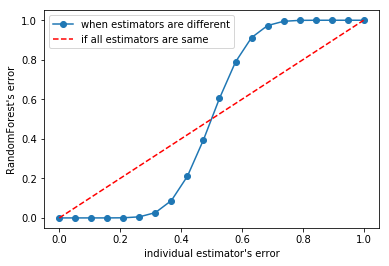

In [51]:
#绘制图形
plt.plot(x,y,"o-",label="when estimators are different")
plt.plot(x,x,"--",color="red",label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error") #随机森林分类的误差率
plt.legend()
plt.show()

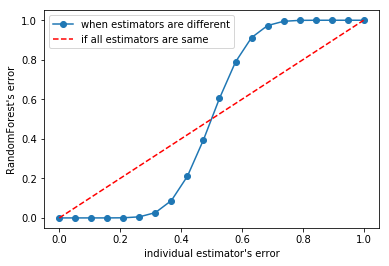

In [52]:
#绘制学习曲线
y=[]
for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i))
                    for i in range(13,26)]).sum()
    y.append(E)
    #绘制图形
plt.plot(x,y,"o-",label="when estimators are different")
plt.plot(x,x,"--",color="red",label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error") #随机森林分类的误差率
plt.legend()
plt.show()

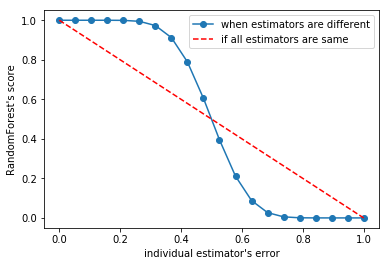

In [53]:
#绘制学习曲线
score=[]
for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i))
                    for i in range(13,26)]).sum()
    score.append(1-E)
#绘制图形
plt.plot(x,score,"o-",label="when estimators are different")
plt.plot(x,1-x,"--",color="red",label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's score") #随机森林分类的误差率
plt.legend()
plt.show()

### 随机森林回归器


In [54]:
from sklearn.datasets import load_boston  #波斯顿房屋数据
from sklearn.model_selection import cross_val_score  #交叉验证包
from sklearn.ensemble import RandomForestRegressor  #随机森林回归

In [55]:
boston=load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [56]:
boston.target #标签（连续数值）

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [57]:
regressor = RandomForestRegressor(n_estimators=100,random_state=0)  #实例化随机森林回归器
cross_val_score(regressor, boston.data, boston.target, cv=10
               ,scoring = "neg_mean_squared_error") 
#得到的是负的均方误差，如果不设定scoring = "neg_mean_squared_error"，则返回的是R2，有正有负

array([-10.72900447,  -5.36049859,  -4.74614178, -20.84946337,
       -12.23497347, -17.99274635,  -6.8952756 , -93.78884428,
       -29.80411702, -15.25776814])

In [58]:
#查看所有可以用的评估指标
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

#### 实例：用回归森林回归填补缺失值

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#魔法命令后面不能加任何的备注
from sklearn.datasets import load_boston #波斯顿房屋数据集
from sklearn.impute import SimpleImputer  
#sklearn中专门用于填补缺失值的包（20版本及以上才可以使用）
from sklearn.ensemble import RandomForestRegressor #随机森林回归器
from sklearn.model_selection import cross_val_score #交叉验证包
from sklearn.model_selection import train_test_split #数据集切分包

In [60]:
#查看波斯顿原始数据集
dataset=load_boston()

In [61]:
dataset.data.shape #接下来的构造都是针对特征进行

(506, 13)

In [62]:
506*13 #总共6578个数据

6578

In [63]:
pd.DataFrame(dataset.data)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [64]:
X_full, y_full = dataset.data, dataset.target #X_full表示没有对数据进行处理，数值都是满的，没有缺失值

In [65]:
n_samples = X_full.shape[0]  #返回的是样本数
n_features = X_full.shape[1]  #特征数

In [66]:
n_samples

506

In [67]:
n_features

13

In [68]:
#构建含有缺失值的数据集
rng = np.random.RandomState(0)  #设立随机数种子
missing_rate = 0.5   #缺失值比例，随机设立的
n_missing_samples = int(np.floor(n_samples * n_features * missing_rate))
#np.floor表示向下取整，是一个浮点数

In [69]:
n_missing_samples

3289

In [70]:
missing_features = rng.randint(0,n_features,n_missing_samples)  
missing_samples = rng.randint(0,n_samples,n_missing_samples)

In [71]:
X_full[0,0]

0.00632

In [72]:
#防止数据丢失，先将其进行复制
X_missing = X_full.copy()
y_missing = y_full.copy()

In [73]:
X_missing[missing_samples,missing_features] = np.nan  #直接重新复制将其变成缺失值
X_missing = pd.DataFrame(X_missing)

In [74]:
X_missing

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,NaN,NaN,0.538,NaN,65.2,4.0900,1.0,296.0,NaN,NaN,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,2.0,NaN,NaN,396.90,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,61.1,NaN,2.0,242.0,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,0.458,NaN,45.8,NaN,NaN,222.0,18.7,NaN,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,NaN,NaN,NaN,NaN,18.7,NaN,5.33
5,NaN,0.0,NaN,0.0,NaN,6.430,58.7,6.0622,NaN,222.0,18.7,NaN,5.21
6,NaN,12.5,NaN,0.0,0.524,NaN,66.6,5.5605,NaN,NaN,15.2,NaN,12.43
7,NaN,12.5,NaN,NaN,0.524,NaN,96.1,5.9505,NaN,311.0,15.2,396.90,19.15
8,NaN,NaN,7.87,NaN,0.524,5.631,NaN,6.0821,5.0,311.0,NaN,NaN,29.93
9,0.17004,NaN,7.87,0.0,0.524,NaN,NaN,6.5921,NaN,311.0,NaN,386.71,NaN


In [185]:
X_missing.isnull().sum() #查看每一列的缺失值的总和

0     200
1     201
2     200
3     203
4     202
5     201
6     185
7     197
8     196
9     197
10    204
11    214
12    189
dtype: int64

In [75]:
X_missing.isnull().mean(axis=1) #算出每一行的缺失值比例

0      0.461538
1      0.307692
2      0.461538
3      0.615385
4      0.538462
5      0.384615
6      0.461538
7      0.384615
8      0.461538
9      0.461538
10     0.384615
11     0.307692
12     0.384615
13     0.615385
14     0.307692
15     0.230769
16     0.307692
17     0.538462
18     0.230769
19     0.307692
20     0.230769
21     0.230769
22     0.384615
23     0.615385
24     0.615385
25     0.307692
26     0.615385
27     0.153846
28     0.307692
29     0.230769
         ...   
476    0.461538
477    0.384615
478    0.615385
479    0.384615
480    0.461538
481    0.307692
482    0.384615
483    0.461538
484    0.307692
485    0.230769
486    0.307692
487    0.307692
488    0.692308
489    0.153846
490    0.384615
491    0.230769
492    0.538462
493    0.538462
494    0.384615
495    0.307692
496    0.153846
497    0.461538
498    0.461538
499    0.153846
500    0.230769
501    0.538462
502    0.076923
503    0.538462
504    0.307692
505    0.307692
Length: 506, dtype: floa

In [76]:
X_missing.isnull().mean(axis=1).max()  #计算缺失值最多的行缺失值占比

0.8461538461538461

In [77]:
X_missing.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,NaN,NaN,0.538,NaN,65.2,4.0900,1.0,296.0,NaN,NaN,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,2.0,NaN,NaN,396.9,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,61.1,NaN,2.0,242.0,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,0.458,NaN,45.8,NaN,NaN,222.0,18.7,NaN,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,NaN,NaN,NaN,NaN,18.7,NaN,5.33


In [78]:
#用均值进行填补（fill_value只有在用常数填补的时候才有用）
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean') #进行实例化， strategy='mean'表示用什么进行填补
X_missing_mean = imp_mean.fit_transform(X_missing) #fit_transform

In [79]:
pd.DataFrame(X_missing_mean).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.627579,18.000000,11.163464,0.066007,0.538000,6.305921,65.2,4.090000,1.000000,296.000000,18.521192,352.741952,4.980000
1,0.027310,0.000000,11.163464,0.000000,0.469000,6.305921,78.9,4.967100,2.000000,405.935275,18.521192,396.900000,9.140000
2,0.027290,10.722951,7.070000,0.000000,0.564128,7.185000,61.1,3.856371,2.000000,242.000000,18.521192,352.741952,12.991767
3,3.627579,10.722951,11.163464,0.000000,0.458000,6.305921,45.8,3.856371,9.383871,222.000000,18.700000,352.741952,12.991767
4,3.627579,0.000000,2.180000,0.000000,0.564128,7.147000,67.4,3.856371,9.383871,405.935275,18.700000,352.741952,5.330000


In [80]:
#用0进行填补
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0) #进行实例化， strategy='mean'表示用什么进行填补
X_missing_0 = imp_mean.fit_transform(X_missing) #fit_transform

In [81]:
pd.DataFrame(X_missing_mean).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.627579,18.000000,11.163464,0.066007,0.538000,6.305921,65.2,4.090000,1.000000,296.000000,18.521192,352.741952,4.980000
1,0.027310,0.000000,11.163464,0.000000,0.469000,6.305921,78.9,4.967100,2.000000,405.935275,18.521192,396.900000,9.140000
2,0.027290,10.722951,7.070000,0.000000,0.564128,7.185000,61.1,3.856371,2.000000,242.000000,18.521192,352.741952,12.991767
3,3.627579,10.722951,11.163464,0.000000,0.458000,6.305921,45.8,3.856371,9.383871,222.000000,18.700000,352.741952,12.991767
4,3.627579,0.000000,2.180000,0.000000,0.564128,7.147000,67.4,3.856371,9.383871,405.935275,18.700000,352.741952,5.330000


In [82]:
#使用随机森林回归器填补缺失值
X_missing_reg=X_missing.copy()
sortindex=np.argsort(X_missing_reg.isnull().sum(axis=0)).values  #argsort先将数据进行从小到大排序，然后返回相应的索引

In [83]:
sortindex  #也就是先填补索引为6的列，然后依次向后填补

array([ 6, 12,  8,  7,  9,  0,  2,  1,  5,  4,  3, 10, 11], dtype=int64)

In [84]:
#以第6列为例
i=sortindex[0]  #特征的索引

In [85]:
df=X_missing_reg
fillc=df.iloc[:,i]  #提取标签

In [86]:
#构建新的特征矩阵（包含两部分，除了i列之外所有的特征+原来的标签）
# df = pd.concat([df.iloc[:,df.columns != i],pd.DataFrame(y_full)],axis=1)

In [87]:
#用随机森林进行填补(一列一列的填补，先填补缺失值少的列)
for i in sortindex:
    #构建我们的新特征矩阵和新标签
    df = X_missing_reg
    fillc = df.iloc[:,i]
    df = pd.concat([df.iloc[:,df.columns != i],pd.DataFrame(y_full)],axis=1)
    
    #在新特征矩阵中，对含有缺失值的列，进行0的填补
    df_0 =SimpleImputer(missing_values=np.nan,
                        strategy='constant',fill_value=0).fit_transform(df)  #strategy='constant'用常量进行填补
    
    #找出我们的训练集和测试集
    Ytrain = fillc[fillc.notnull()]  #没有缺失值的部分作为训练集（标签），notnull也可以用取反
    Ytest = fillc[fillc.isnull()]    #有缺失值的部分是测试集（标签）
    Xtrain = df_0[Ytrain.index,:]    #Ytrain.index训练集的行索引，df_0表示用0进行填充
    Xtest = df_0[Ytest.index,:]      #Ytest.index测试集的行索引
    
    #用随机森林回归来填补缺失值
    rfc = RandomForestRegressor(n_estimators=100)  #实例化一个100棵数的随机森林
    rfc = rfc.fit(Xtrain, Ytrain)   #训练模型
    Ypredict = rfc.predict(Xtest)   #对模型进行预测
    
    #将填补好的特征返回到我们的原始的特征矩阵中
    X_missing_reg.loc[X_missing_reg.iloc[:,i].isnull(),i] = Ypredict  #定位找到有缺失值的列，并进行赋值

In [88]:
X_missing_reg #填补后的原始数据

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.250379,18.000,6.5785,0.14,0.538000,6.57264,65.200,4.090000,1.00,296.00,18.005,389.9052,4.9800
1,0.027310,0.000,6.2144,0.00,0.469000,6.16450,78.900,4.967100,2.00,293.31,18.381,396.9000,9.1400
2,0.027290,14.720,7.0700,0.00,0.461417,7.18500,61.100,4.414296,2.00,242.00,17.841,392.0549,5.2864
3,0.101083,22.325,3.1869,0.00,0.458000,6.80236,45.800,4.621828,3.67,222.00,18.700,392.8407,6.0460
4,0.073414,0.000,2.1800,0.00,0.457655,7.14700,56.884,5.150915,3.98,260.75,18.700,392.6784,5.3300
5,0.057589,0.000,4.8385,0.00,0.459431,6.43000,58.700,6.062200,3.45,222.00,18.700,391.3044,5.2100
6,0.219622,12.500,8.1851,0.00,0.524000,6.07518,66.600,5.560500,4.18,301.88,15.200,392.5584,12.4300
7,0.647608,12.500,8.7122,0.46,0.524000,6.52180,96.100,5.950500,5.25,311.00,15.200,396.9000,19.1500
8,0.369620,13.270,7.8700,0.00,0.524000,5.63100,78.984,6.082100,5.00,311.00,17.400,373.8331,29.9300
9,0.170040,18.985,7.8700,0.00,0.524000,5.88752,68.038,6.592100,5.75,311.00,16.953,386.7100,13.7743


In [90]:
#对填补好的数据进行建模
X = [X_full,X_missing_mean,X_missing_0,X_missing_reg]  #创建特征矩阵

mse = []
std = []
for x in X:
    estimator = RandomForestRegressor(random_state=0, n_estimators=100)
    scores = cross_val_score(estimator,x,y_full,   #x表示特征，y_full是标签
                             scoring='neg_mean_squared_error', cv=5).mean()
    mse.append(scores * -1)

In [91]:
mse  #均方误差

[21.62860460743544, 40.84405476955929, 49.50657028893417, 19.287240141390008]

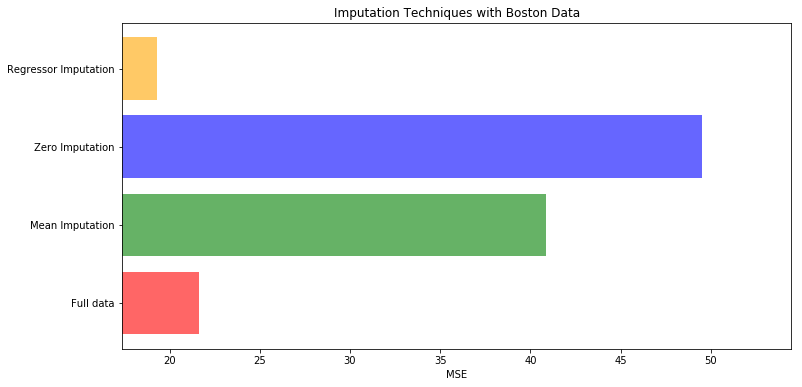

In [92]:
#绘图
x_labels = ['Full data',
            'Mean Imputation',
            'Zero Imputation',
            'Regressor Imputation']  #建立标签列表
colors = ['r', 'g', 'b', 'orange']    #建立颜色列表

plt.figure(figsize=(12, 6))  #设置画布
ax = plt.subplot(111)   #子图
for i in np.arange(len(mse)):  #循环4次
    ax.barh(i, mse[i],color=colors[i], alpha=0.6, align='center') # barh表示水平的条形图  ，center刻度线是居中对齐
#对条形图进行装饰
ax.set_title('Imputation Techniques with Boston Data')  #设定图标标题（在子图上进行）
ax.set_xlim(left=np.min(mse) * 0.9,
             right=np.max(mse) * 1.1)      #xlime表示x轴的刻度范围
ax.set_yticks(np.arange(len(mse)))   #设定y轴的刻度
ax.set_xlabel('MSE')   #设定x轴的标签
ax.set_yticklabels(x_labels)   #设定y轴的刻度标签
plt.show()  #柱子越高，误差越大，随机森林填补结果比原数据还好，可能是因为原数据中存在噪音，在随机森林填补的过程中，将噪音进行了去除

## Boosting算法---AdaBoost
AdaBoostClassifier实战

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import AdaBoostClassifier  #adaboost分类器
from sklearn.tree import DecisionTreeClassifier   #决策树分类器
from sklearn.datasets import make_gaussian_quantiles  #创造数据集的包

In [34]:
# 生成2维正态分布，生成的数据按分位数分为两类n_classes，500个样本n_samples,2个样本特征n_features，协方差系数为2
X1, y1 = make_gaussian_quantiles(cov=2.0,n_samples=500, n_features=2,n_classes=2, random_state=1)

In [35]:
X1

array([[ 2.69359418e+00,  1.57127145e+00],
       [-1.34129623e+00, -5.98888751e-01],
       [-1.14388268e+00,  7.88338434e-01],
       [-6.77630468e-01,  4.95211145e-01],
       [ 1.72281294e-01,  1.59733146e+00],
       [-1.48979921e-01,  8.91231264e-01],
       [ 9.58564660e-01, -1.56493064e+00],
       [ 5.18071703e-01, -1.47727247e+00],
       [ 1.39488860e+00,  3.01982539e-01],
       [-5.00177990e-02,  2.98484629e+00],
       [-1.94188114e+00,  4.45702687e-01],
       [ 6.93758081e-01, -1.97322818e+00],
       [ 8.57584682e-01,  3.24380656e+00],
       [-9.80455831e-02, -1.53289531e-01],
       [ 5.90154155e-01,  1.10983330e+00],
       [ 1.46152014e+00, -2.06861649e-01],
       [ 1.06255131e+00,  1.98549130e-01],
       [ 4.94176980e-02,  2.05614996e+00],
       [-5.20680292e-02,  1.58913041e-01],
       [-8.42993379e-01,  1.21851908e+00],
       [ 6.52184525e-01, -1.66309064e+00],
       [ 2.00309969e-01, -3.55859105e+00],
       [-8.50164101e-01,  7.86406700e-01],
       [-2.

In [36]:
X1.shape

(500, 2)

In [37]:
np.unique(y1)  #标签去重

array([0, 1])

In [38]:
# 生成2维正态分布，生成的数据按分位数分为两类，400个样本,2个样本特征均值都为3，协方差系数为1.5，均值不设定，默认为0
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,n_samples=400, n_features=2, n_classes=2, random_state=1)

In [39]:
X2.shape

(400, 2)

In [40]:
X2.mean(0)

array([3.03247236, 3.04035555])

In [41]:
np.unique(y2)   #标签去重

array([0, 1])

In [42]:
#将两组数据合成一组数据
X = np.concatenate((X1, X2))      #np.concatenate专门用来合并array数组
y = np.concatenate((y1, - y2 + 1))     

In [43]:
X

array([[ 2.69359418,  1.57127145],
       [-1.34129623, -0.59888875],
       [-1.14388268,  0.78833843],
       ...,
       [ 4.49166687,  0.62316094],
       [-0.06975033,  0.41068858],
       [ 1.6858925 ,  3.60644297]])

In [44]:
y

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,

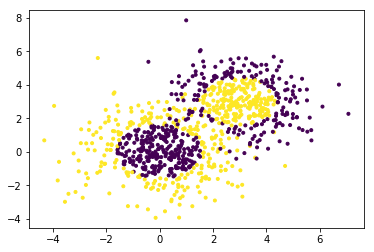

In [45]:
#可视化
plt.scatter(X[:, 0], X[:, 1], marker='.', c=y);

In [46]:
#构建分类器
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, 
                                                min_samples_split=20,
                                                min_samples_leaf=5)
                         ,algorithm="SAMME",n_estimators=200,  #n_estimators迭代200次
                         learning_rate=0.8)

In [47]:
bdt.fit(X, y)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.8, n_estimators=200, random_state=None)

In [48]:
print("Score:" ,bdt.score(X,y))

Score: 0.9133333333333333


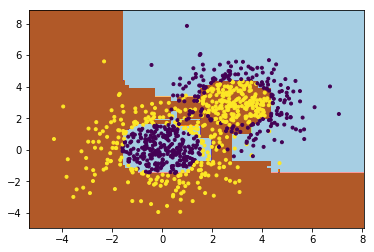

In [49]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  #横坐标
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  #纵坐标
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),  #meshgrid向上重复，向右平移形成一个网格
                     np.arange(y_min, y_max, 0.02))  #在最大的和最小的之间每隔0.02生成一个数

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()]) #xx.ravel()扁平化，降维，并用分类器进行预测
Z = Z.reshape(xx.shape)  #将一维的更改形状
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)  #将xx和yy都填充颜色，0填一种，1填一种，camp是色谱 contourf是用来绘制网格的
plt.scatter(X[:, 0], X[:, 1], marker='.', c=y)
plt.show()

In [50]:
a,b=np.meshgrid([1,2,3],[7,8])

In [51]:
a    #向上重复

array([[1, 2, 3],
       [1, 2, 3]])

In [52]:
b   #向右平移

array([[7, 7, 7],
       [8, 8, 8]])

In [53]:
bdt.score(X,y)   #模型预测的准确率

0.9133333333333333

In [56]:
#将弱分类器的数量由200增加到300
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, 
                                                min_samples_split=20,
                                                min_samples_leaf=5)
                         ,algorithm="SAMME", n_estimators=300, learning_rate=0.8)
bdt.fit(X, y)
print("Score:" ,bdt.score(X,y))

Score: 0.9622222222222222


In [60]:
#将步长由0.8降为0.5
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, 
                                                min_samples_split=20,
                                                min_samples_leaf=5)
                         ,algorithm="SAMME",n_estimators=300, learning_rate=0.5)
bdt.fit(X, y)
print("Score:" ,bdt.score(X,y))

Score: 0.8944444444444445


In [61]:
#将步长改成0.7，将弱分类器数量改为700
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, 
                                                min_samples_split=20,
                                                min_samples_leaf=5)
                         ,algorithm="SAMME", n_estimators=700, learning_rate=0.7)
bdt.fit(X, y)
print("Score:" ,bdt.score(X,y)) 
#主要调的参数是弱分类器的数量和学习率，两者是此消彼长的，一个变大，另一个变小，要寻找两者的平衡点

Score: 0.9688888888888889


### Adaboost回归器
小例子

In [74]:
#导入所需的模块和包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor as DTR #决策树回归器
from sklearn.ensemble import AdaBoostRegressor as ABR #adaboost回归器

In [75]:
X = np.linspace(0, 6, 100).reshape(-1,1)  #将一维的变成一个二维的，1表示1列，-1表示占位
# 1在行的位置就把数据变成一行，1在列的位置就把数据变成一列，-1用来占位

In [76]:
 X.shape[0]

100

In [77]:
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])  #rng.normal生成一个均值为0，标准差为0.1，形状为shape[0]的正态分布
#rng.normal(0, 0.1, X.shape[0]) 作用是人为增加噪音.

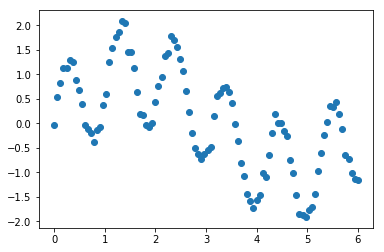

In [78]:
plt.scatter(X,y);  #绘制数据集的可视化图形

In [79]:
#创造数据集
rng = np.random.RandomState(1)          
X = np.linspace(0, 6, 100).reshape(-1,1)  #将一维的变成一个二维的，1表示1列，-1表示占位
# 1在行的位置就把数据变成一行，1在列的位置就把数据变成一列，-1用来占位
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])  #rng.normal生成一个均值为0，标准差为0.1，形状为shape[0]的正态分布
#rng.normal(0, 0.1, X.shape[0]) 作用是人为增加噪音.

In [83]:
#训练回归模型
regr_1 = DTR(max_depth=4)

regr_2 = ABR(DTR(max_depth=4),
                          n_estimators=300, random_state=rng)

regr_1.fit(X, y)
regr_2.fit(X, y)

#预测结果
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

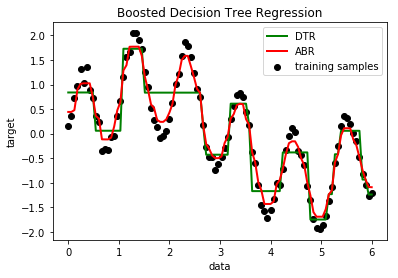

In [84]:
#绘制可视化图形（这里只是在演示，因此没有设置训练集和测试集）
plt.figure()
plt.scatter(X, y, c="k", label="training samples")  #数据的散点图
plt.plot(X, y_1, c="g", label="DTR", linewidth=2)   #回归数拟合曲线
plt.plot(X, y_2, c="r", label="ABR", linewidth=2)   #ABR回归器拟合曲线
#图形装饰
plt.xlabel("data")   #x轴标签
plt.ylabel("target")  #y轴标签
plt.title("Boosted Decision Tree Regression")   #图标标题
plt.legend()  #图例，里面有loc参数，表示图例放置的位置，默认是best，就是那里有空就放在那里
plt.show()

In [86]:
%pwd  
#查询打开的ipy是放在哪个路径下

'C:\\Users\\Administrator\\Desktop\\机器学习'

## 实例：随机森林在乳腺癌数据上的调参

In [87]:
# 1.导包
from sklearn.datasets import load_breast_cancer  #乳腺癌数据集，分类的数据集
from sklearn.ensemble import RandomForestClassifier  #随机森林分类器
from sklearn.model_selection import GridSearchCV   #带交叉验证的网格搜索
from sklearn.model_selection import cross_val_score    #交叉验证包
import matplotlib.pyplot as plt   #画图包
%matplotlib inline
import pandas as pd
import numpy as np

In [88]:
# 2.实例化数据集
data=load_breast_cancer()

In [89]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [90]:
data.data   #特征

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [92]:
data.data.shape    #特征的形状

(569, 30)

In [93]:
pd.DataFrame(data.data)   #将其变成表格，方便查看数据

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [94]:
data.target  #标签

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [95]:
#简单建模，不对数据做任何的调整
rfc=RandomForestClassifier(n_estimators=100,random_state=90)
score_pre=cross_val_score(rfc,data.data,data.target,cv=10).mean()
score_pre

0.9666925935528475

最高score 0.9684480598046841
最优n_estimators 41


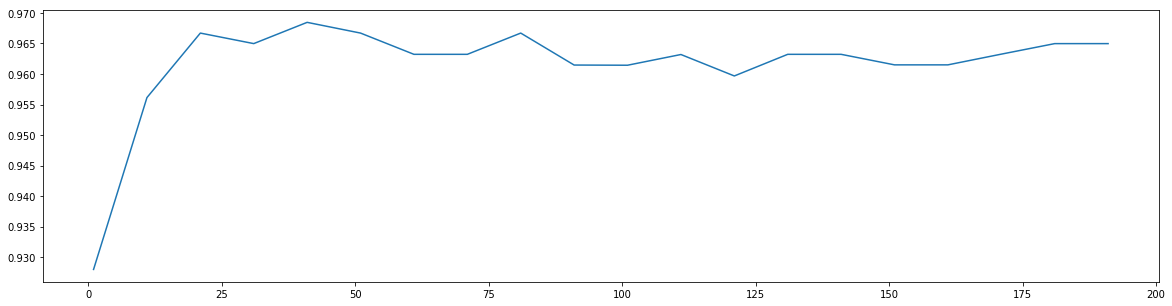

In [98]:
#对模型影响最大的参数进行调参
scorel=[]
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,  #森林里面最少要有一棵树
                                 random_state=90)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)

#打印出最高score和最优n_estimators，并绘制学习曲线
print('最高score',max(scorel))
print('最优n_estimators',(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

0.9719568317345088 39


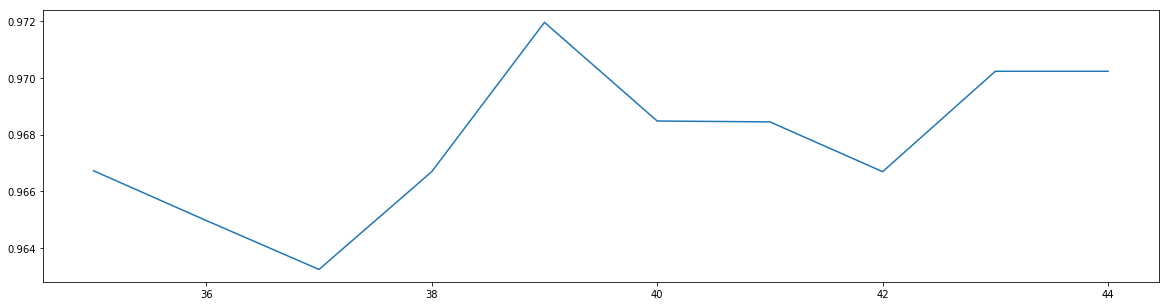

In [99]:
#细化学习曲线
scorel = []
for i in range(35,45):
    rfc = RandomForestClassifier(n_estimators=i,
                                 n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)
print(max(scorel),([*range(35,45)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(35,45),scorel)
plt.show()

In [100]:
#调整max_depth
param_grid = {'max_depth':np.arange(1, 20, 1)}  #从1开始取到20，每1个取一次
rfc = RandomForestClassifier(n_estimators=39,random_state=90)  #实例化
GS = GridSearchCV(rfc,param_grid,cv=10) #网格搜索。rfc实例化好的模型，
GS.fit(data.data,data.target)   #训练数据

E:\python\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=39, n_jobs=None,
            oob_score=False, random_state=90, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [101]:
GS.best_params_   #网格搜索得到的最优参数

{'max_depth': 11}

In [102]:
GS.best_score_     #网格搜索得到的最高准确率

0.9718804920913884

In [103]:
#调整max_features(最大特征数)
param_grid = {'max_features':np.arange(5,30,1)} 
rfc = RandomForestClassifier(n_estimators=39,random_state=90)  #基评估器选39，是因为细化学习曲线后得到最好的准确率时的取值是39
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

E:\python\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=39, n_jobs=None,
            oob_score=False, random_state=90, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [104]:
GS.best_params_   #网格搜索得到的最优参数

{'max_features': 5}

In [105]:
GS.best_score_     #网格搜索得到的最高准确率

0.9718804920913884

In [106]:
#调整min_samples_leaf（最小叶子节点数）
param_grid={'min_samples_leaf':np.arange(1, 1+10, 1)}  #对于数据集比较大的，步长要设置的大一点
rfc = RandomForestClassifier(n_estimators=39,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

E:\python\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=39, n_jobs=None,
            oob_score=False, random_state=90, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [107]:
GS.best_params_   #网格搜索得到的最优参数

{'min_samples_leaf': 1}

In [108]:
GS.best_score_     #网格搜索得到的最高准确率

0.9718804920913884

In [109]:
#调整min_samples_split（最小叶子切分数）
param_grid={'min_samples_split':np.arange(2, 2+20, 1)}

rfc = RandomForestClassifier(n_estimators=39,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

E:\python\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=39, n_jobs=None,
            oob_score=False, random_state=90, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [110]:
GS.best_params_   #网格搜索得到的最优参数

{'min_samples_split': 2}

In [111]:
GS.best_score_     #网格搜索得到的最高准确率

0.9718804920913884

In [112]:
#调整Criterion（不纯度的衡量指标）
param_grid = {'criterion':['gini', 'entropy']}

rfc = RandomForestClassifier(n_estimators=39,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=39, n_jobs=None,
            oob_score=False, random_state=90, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [113]:
GS.best_params_   #网格搜索得到的最优参数

{'criterion': 'gini'}

In [114]:
GS.best_score_     #网格搜索得到的最高准确率

0.9718804920913884

In [115]:
#调整完毕，得到模型的最佳参数
rfc = RandomForestClassifier(n_estimators=39,random_state=90)
score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
score

0.9719568317345088

In [116]:
score-score_pre  #经过调参之后，准确率的变化

0.005264238181661218

### 用随机森林来预测泰坦尼克号

In [1]:
#导入所用的包
from sklearn.ensemble import RandomForestClassifier  #随机森林分类器
from sklearn.model_selection import GridSearchCV   #带交叉验证的网格搜索
from sklearn.model_selection import cross_val_score    #交叉验证包
import matplotlib.pyplot as plt   #画图包
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
#导入泰坦尼克号的数据
data=pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### 预处理

In [3]:
# 正则表达式模块
import re

# 由于年龄中有空值，需要先用平均值对年龄的缺失值进行填充，因为矩阵运算只能是数值型，不能是字符串
data['Age'] = data['Age'].fillna(data['Age'].mean())
# 同理，由于Embarked（登船地点）里面也有空值，所以也需要用出现最多的类型对它进行一个填充
data['Embarked'] = data['Embarked'].fillna('S')

# 对于性别中的male与female，用0和1来表示。首先看性别是否只有两个值
# 对于登船地点的三个值S C Q，也用0 1 2分别表示
# print(data['Sex'].unique())
# print(data['Embarked'].unique())
data.loc[data['Sex'] == 'male', 'Sex'] = 0
data.loc[data['Sex'] == 'female', 'Sex'] = 1

data.loc[data['Embarked'] == 'S', 'Embarked'] = 0
data.loc[data['Embarked'] == 'C', 'Embarked'] = 1
data.loc[data['Embarked'] == 'Q', 'Embarked'] = 2
